In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv(r"C:\Users\Ritu\Downloads\house-prices-advanced-regression-techniques\train.csv")
test_df = pd.read_csv(r"C:\Users\Ritu\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
sale_price = train_df["SalePrice"]

In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [9]:
train_df.describe(include="all") # include both categorical and numerical features

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [10]:
train_df.drop("Id", axis =1,inplace = True)
test_id = test_df["Id"]
test_df.drop("Id", axis =1,inplace = True)

In [11]:
train_df.shape,test_df.shape

((1460, 80), (1459, 79))

# Analysis of Target Variable:

In [12]:
from scipy import stats

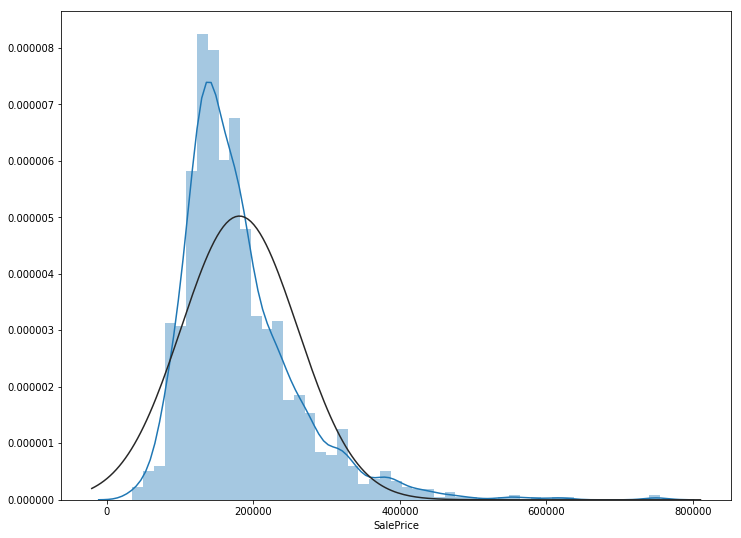

In [13]:
plt.subplots(figsize=(12,9))
sns.distplot(train_df['SalePrice'], fit=stats.norm)

In the above plot we can see that the sale price is positively skewed. Let's apply log transformation to make it more normal

In [14]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice']) # log transform to make it more "normal"

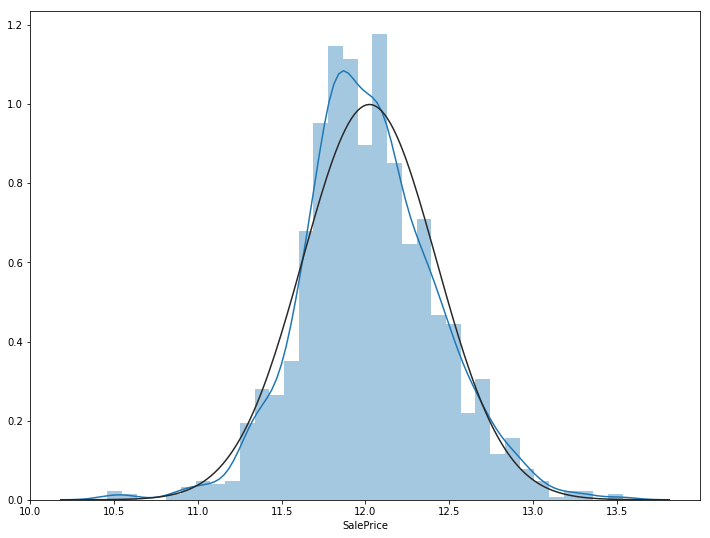

In [15]:
plt.subplots(figsize=(12,9))
sns.distplot(train_df['SalePrice'], fit=stats.norm)

Now, it's more symmetric / normal.

In [16]:
all_df = pd.concat((train_df,test_df)).reset_index(drop = True)

In [17]:
all_df.drop(['SalePrice'],axis =1,inplace = True)

In [18]:
all_df.shape

(2919, 79)

# Exploration of numeric features:

In [19]:
numeric_cols = list(all_df._get_numeric_data().columns) 

In [20]:
print((numeric_cols))

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


In [21]:
numeric_cols_df = all_df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
                       'WoodDeckSF', 
                       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
                       'YrSold']]

In [22]:
numeric_cols_df.shape

(2919, 36)

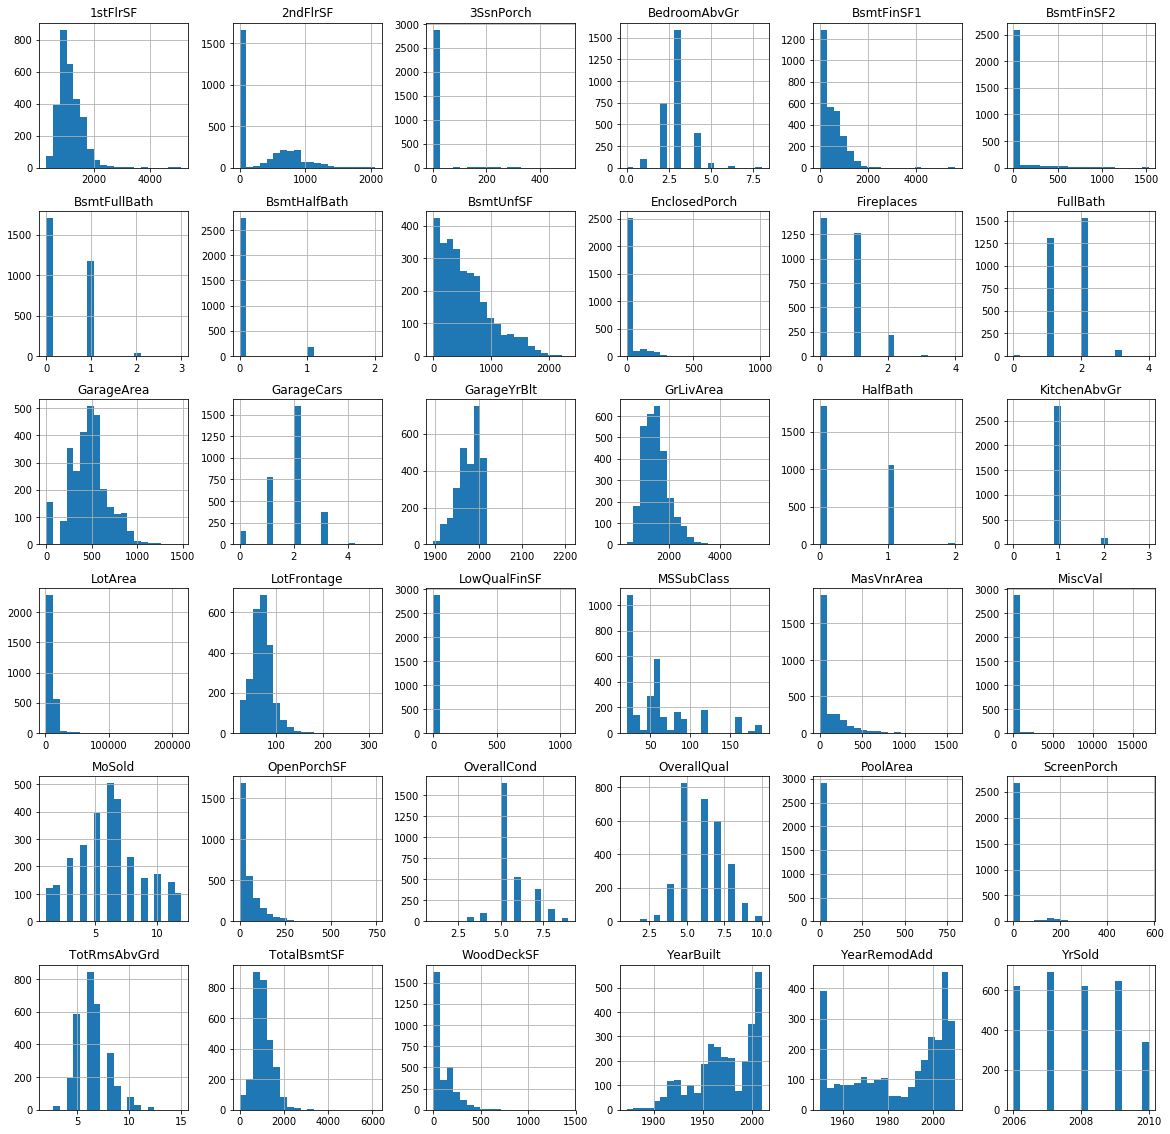

In [23]:
numeric_cols_df.hist(bins =20, figsize = (20,20))
plt.show()

Above plots show distribution of each numeric feature's value. Here we can identify more categorical features and have already been label encoded with numrical values. Also, some of the freatures are normally distributed.

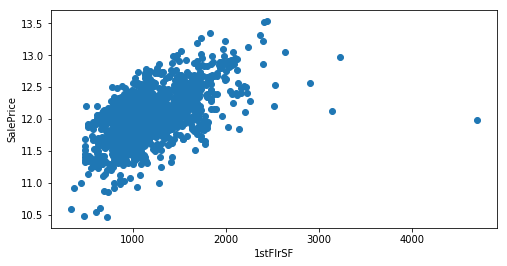

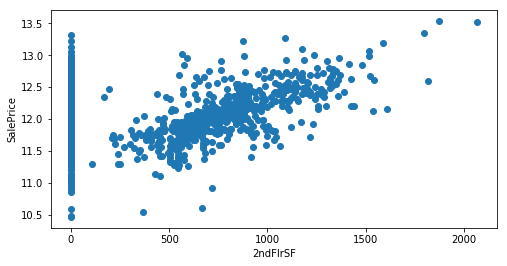

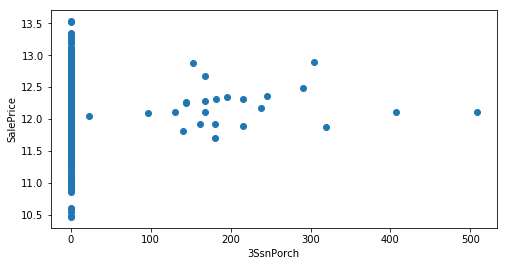

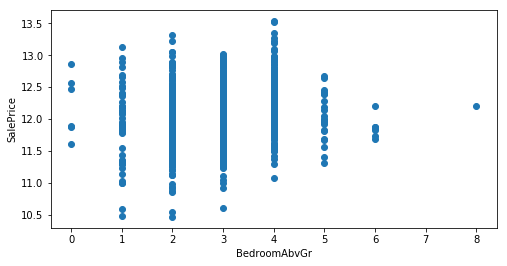

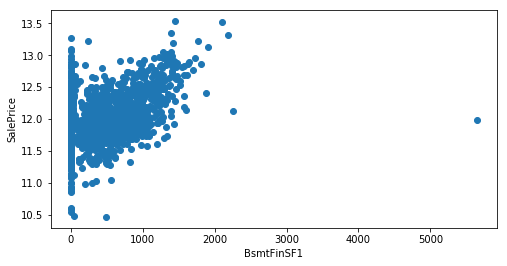

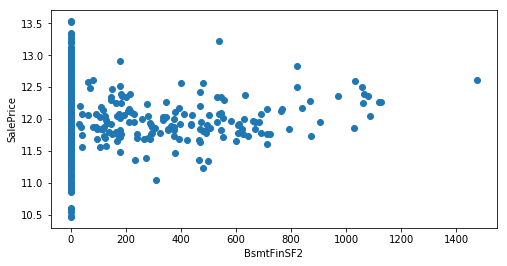

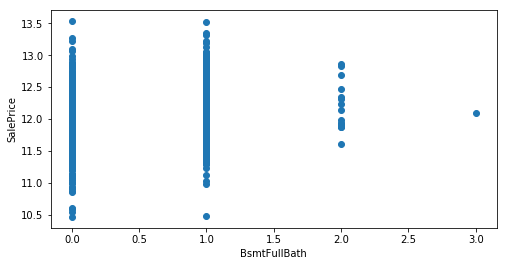

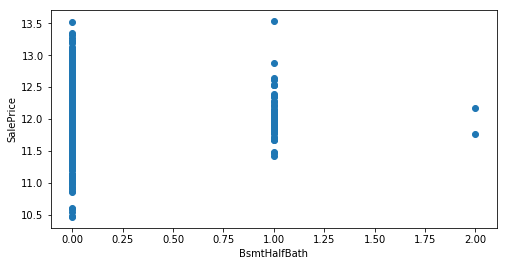

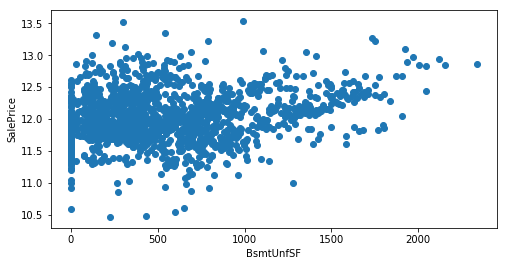

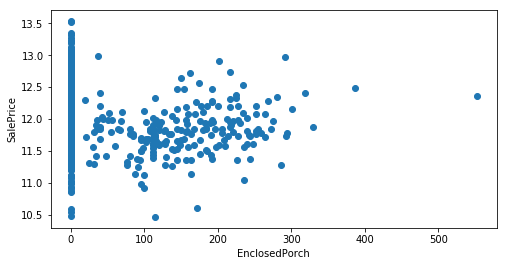

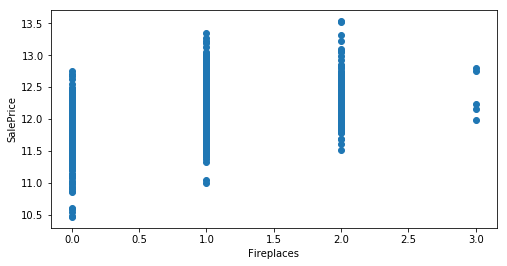

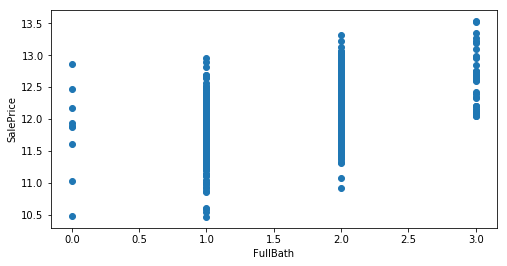

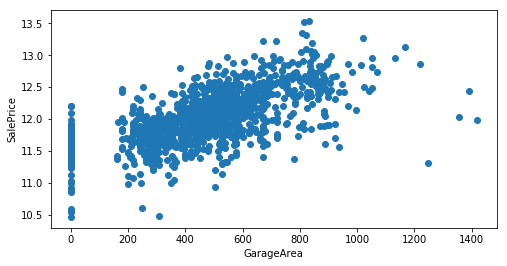

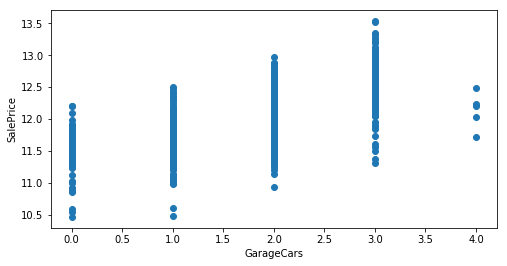

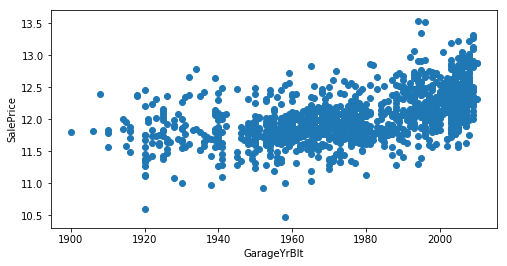

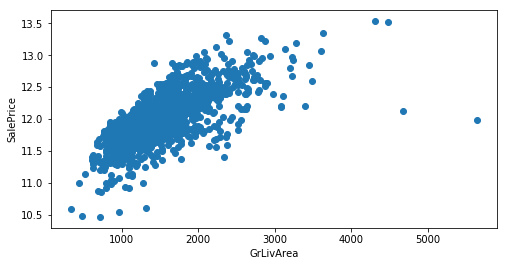

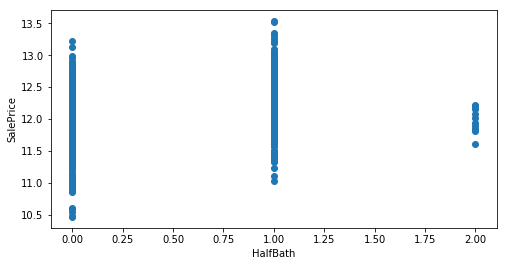

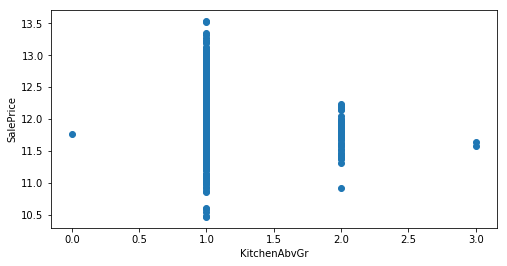

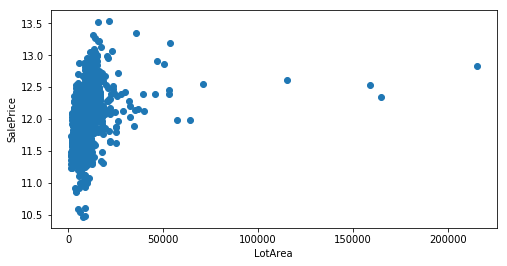

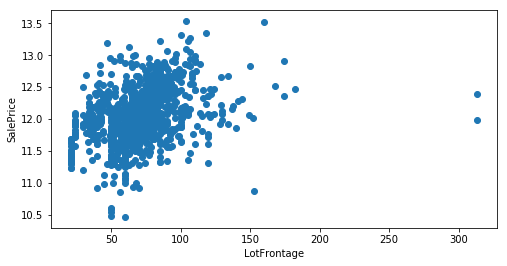

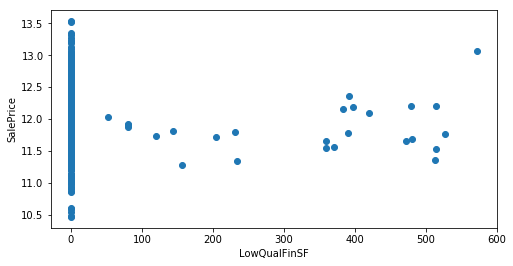

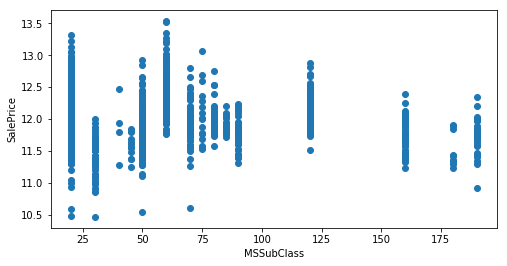

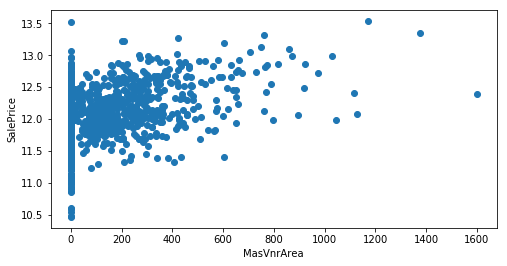

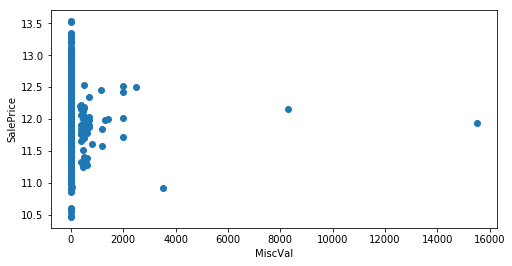

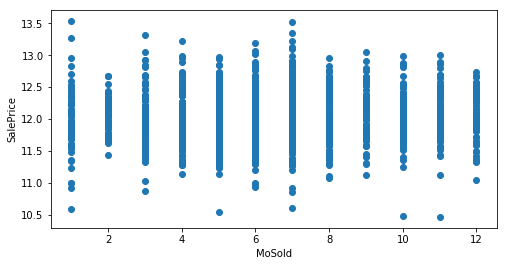

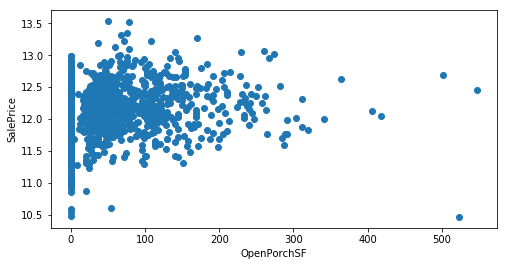

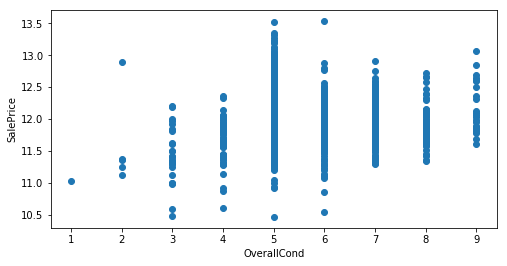

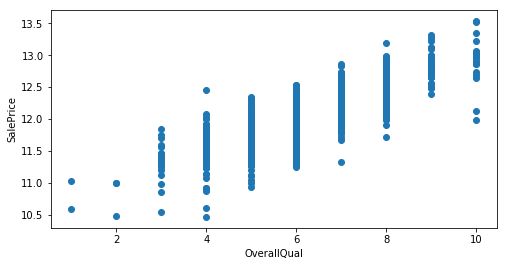

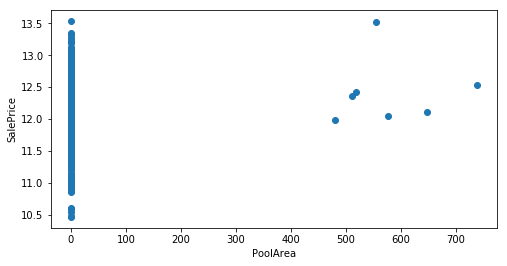

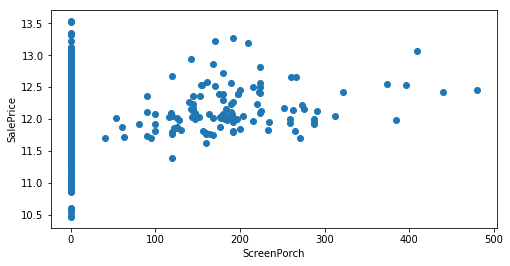

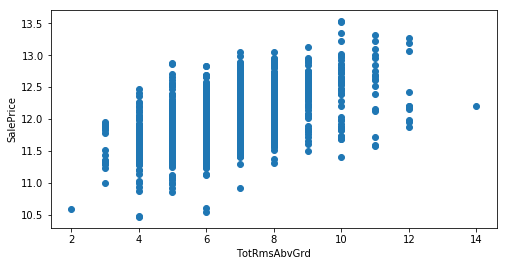

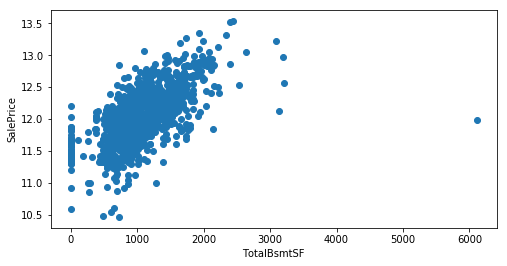

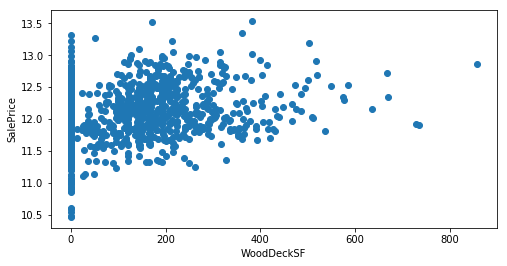

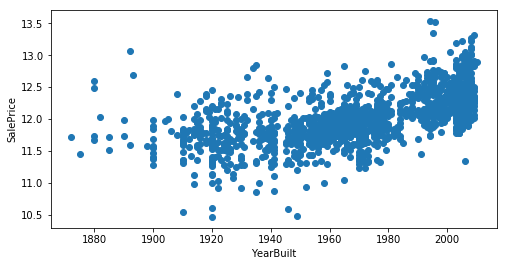

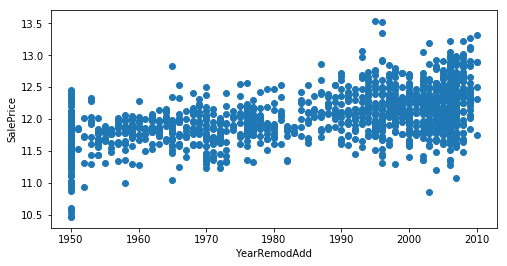

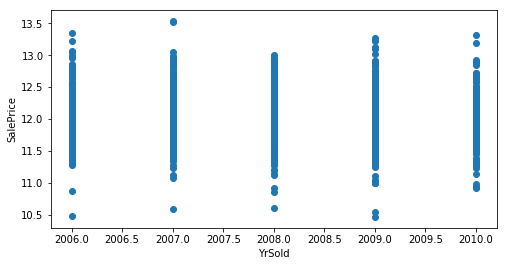

In [24]:
for i in train_df[numeric_cols].columns:
    plt.figure(figsize = (8,4))
    plt.scatter( train_df[numeric_cols][i],train_df["SalePrice"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")

In the above scatter plot, correlation between target variable and each of the numeric features can be seen.

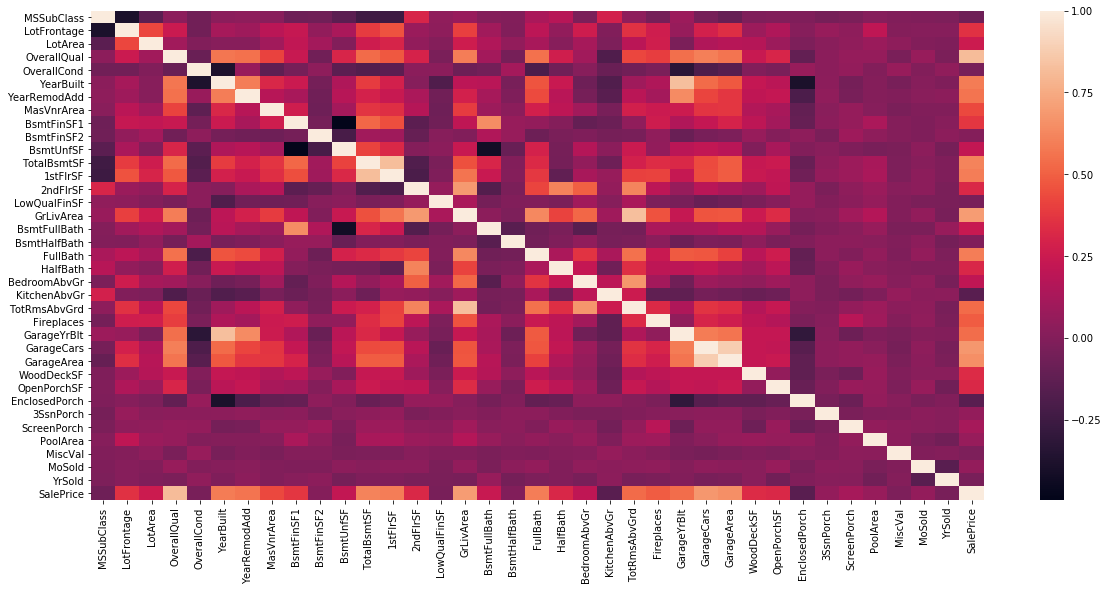

In [25]:
corr = train_df[train_df._get_numeric_data().columns].corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

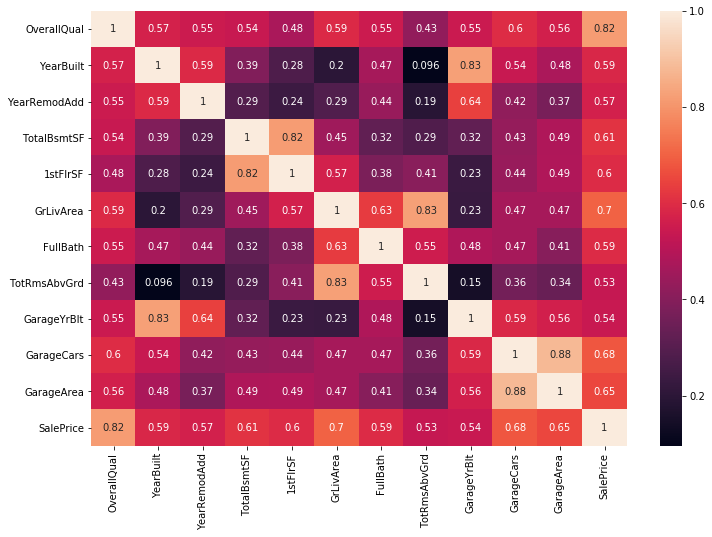

In [26]:
# filtering out only highly co-related features
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train_df[train_df._get_numeric_data().columns][top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [27]:
train_df["OverallQual"].unique() # listing values for highest correlated feature with target variable

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

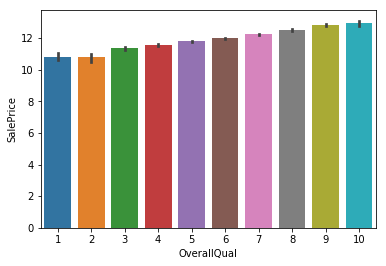

In [28]:
sns.barplot(train_df.OverallQual, train_df.SalePrice) # plotting the highest correlated feature

An increasing trend in SalePrice can be observed with increasing Quality. This is what we expect.

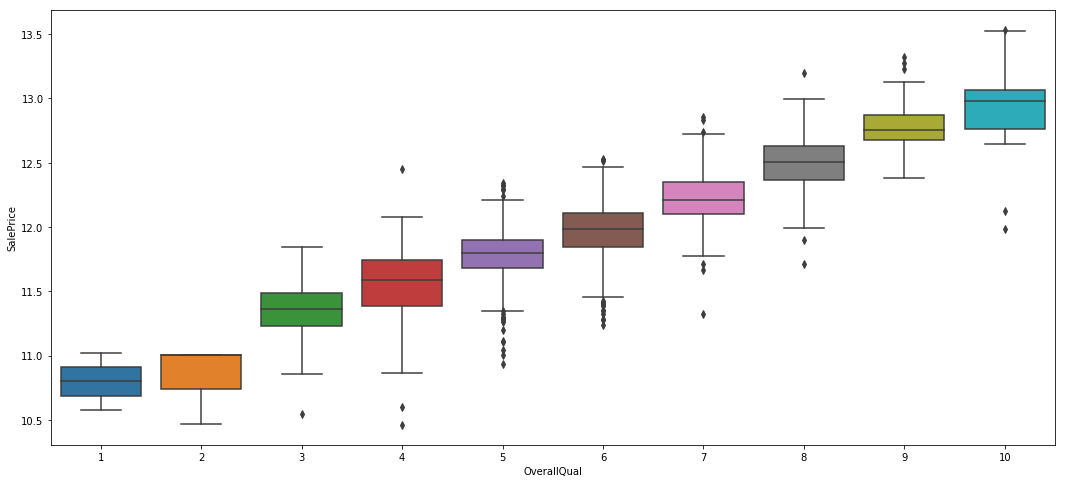

In [29]:
plt.figure(figsize=(18, 8))
sns.boxplot(x=train_df.OverallQual, y=train_df.SalePrice)

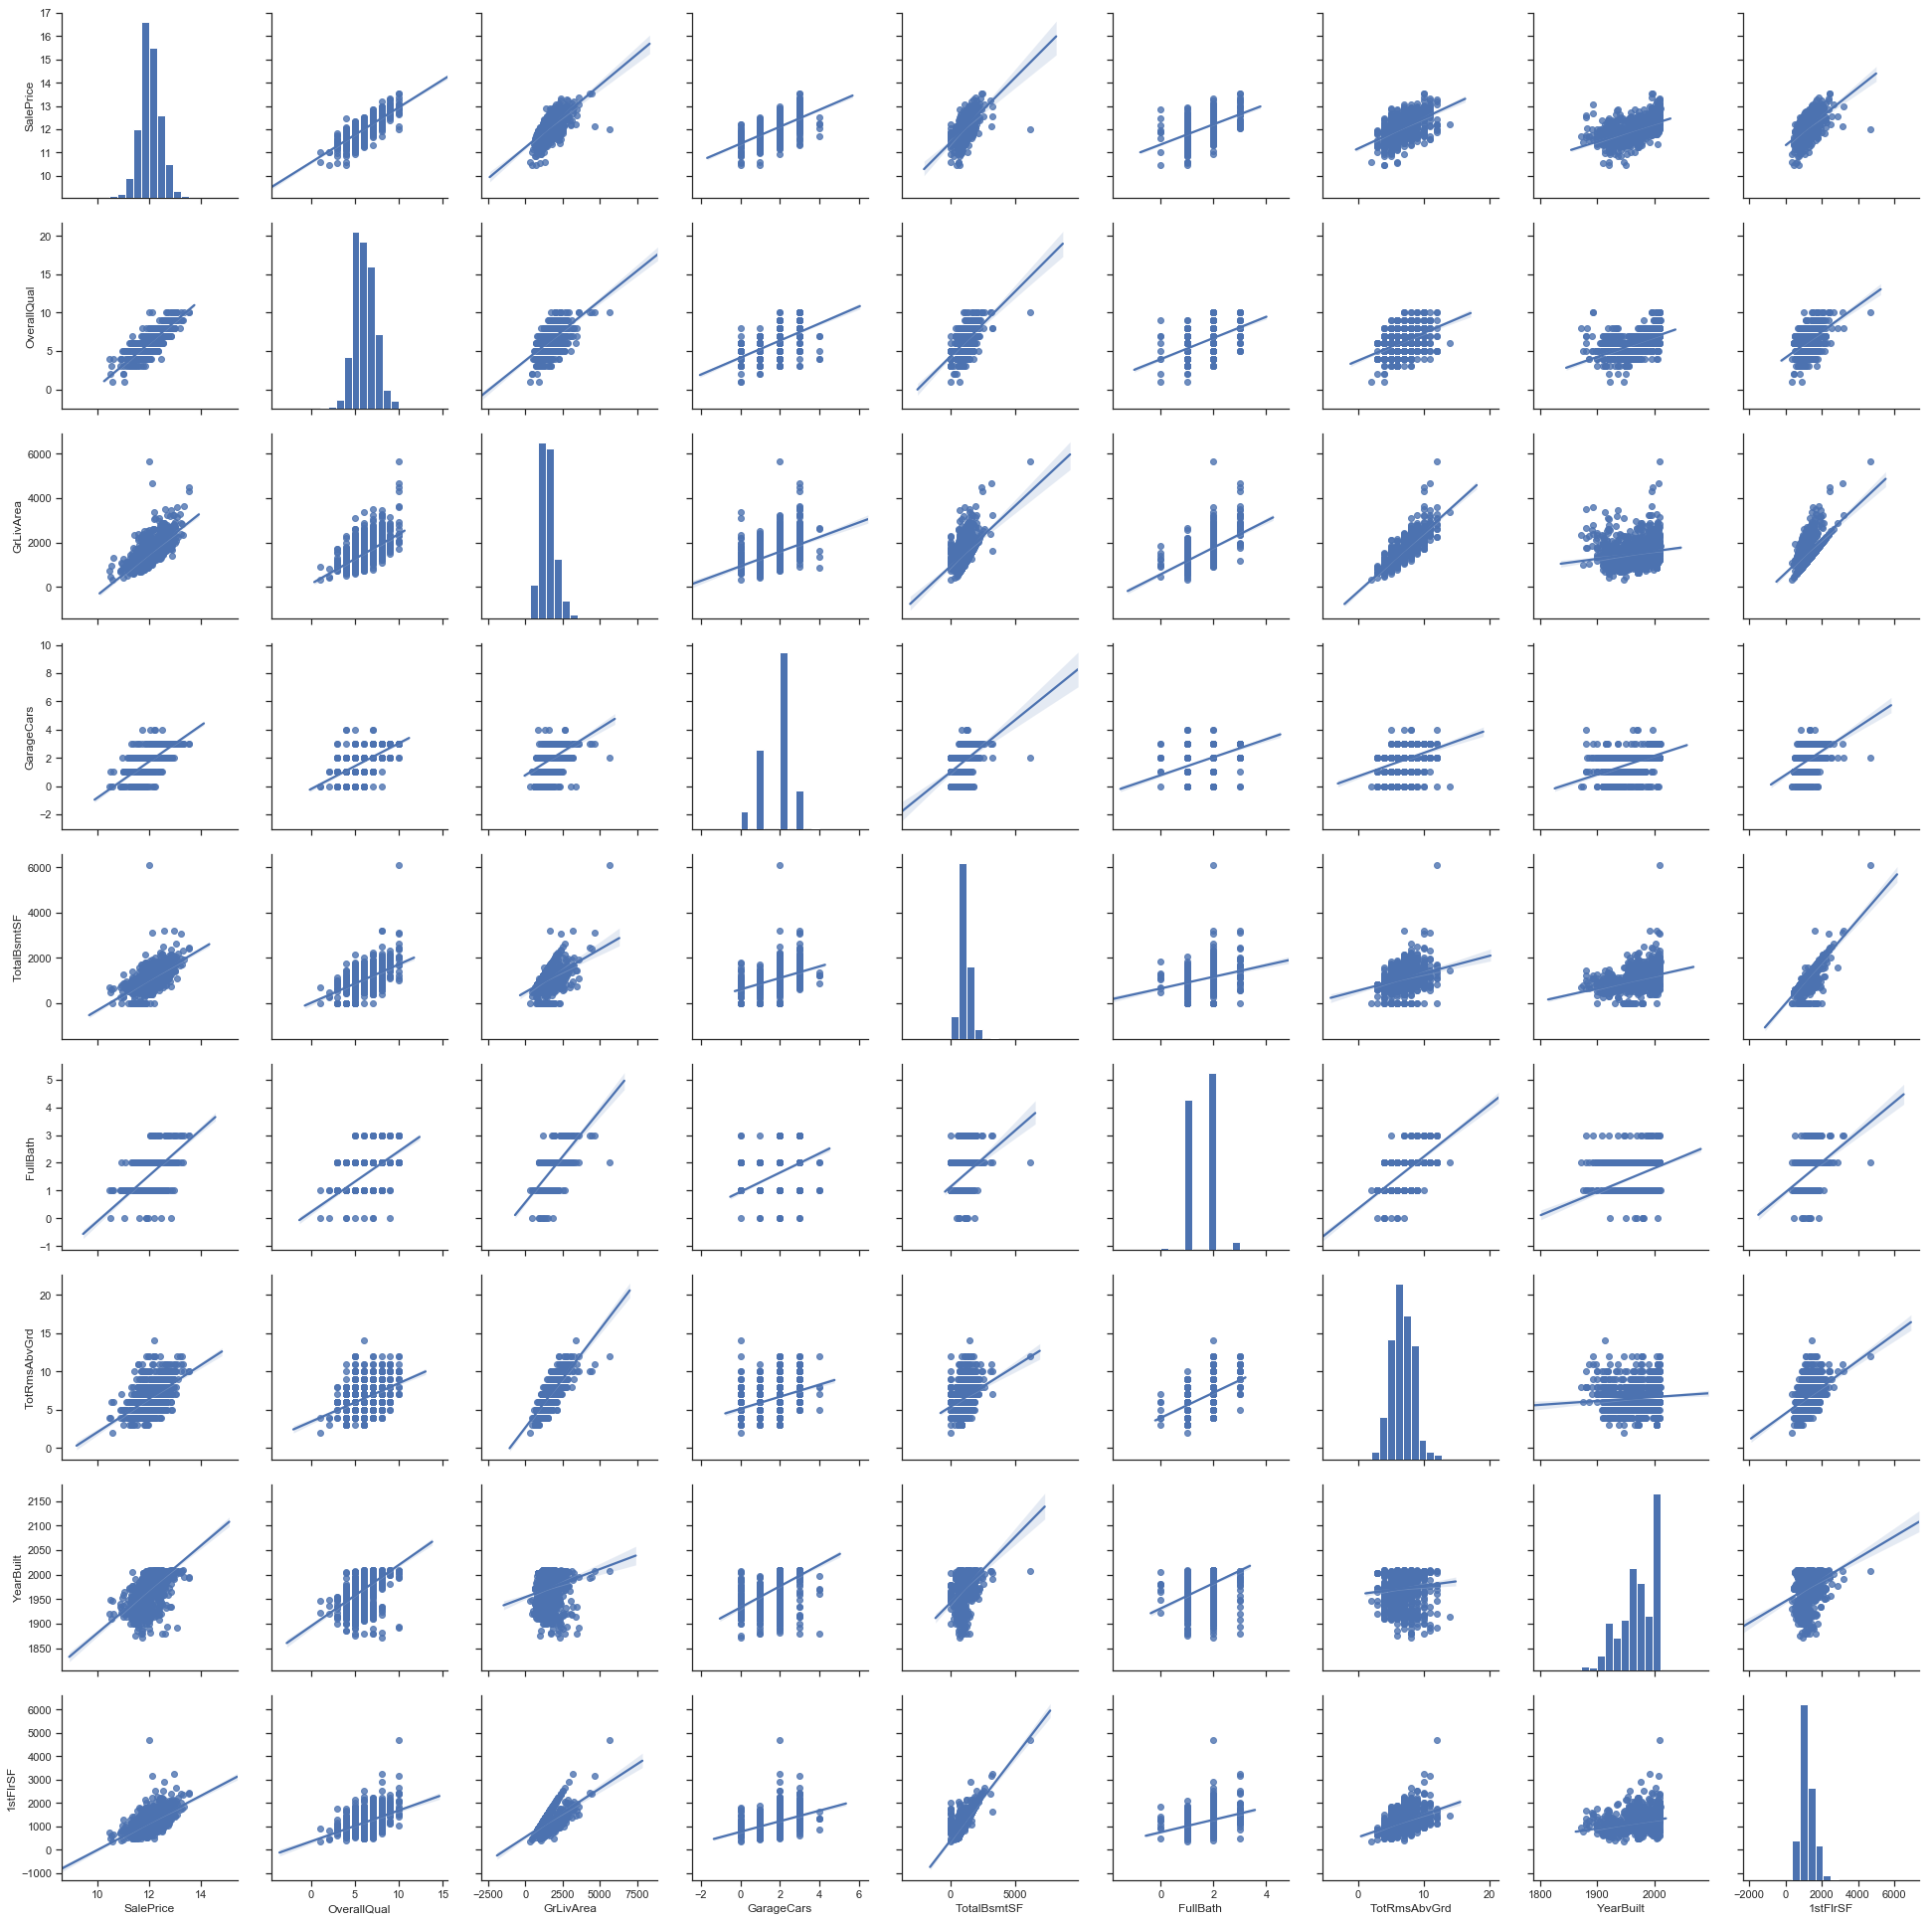

In [30]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       '1stFlrSF']
sns.set(style='ticks')
sns.pairplot(train_df[col], height=3, kind='reg')

# Handling missing data in numeric cols:

In [31]:
data_nan = (numeric_cols_df.isnull().sum() / len(numeric_cols_df)) * 100
data_nan = data_nan.drop(data_nan[data_nan == 0].index).sort_values(ascending=False)[:20]
missing_data = pd.DataFrame({'Missing Ratio' :data_nan})
missing_data

,Missing Ratio
LotFrontage,16.649538
GarageYrBlt,5.447071
MasVnrArea,0.787941
BsmtHalfBath,0.068517
BsmtFullBath,0.068517
GarageArea,0.034258
GarageCars,0.034258
TotalBsmtSF,0.034258
BsmtUnfSF,0.034258
BsmtFinSF2,0.034258


Text(0.5, 1.0, 'Percent missing data by feature')

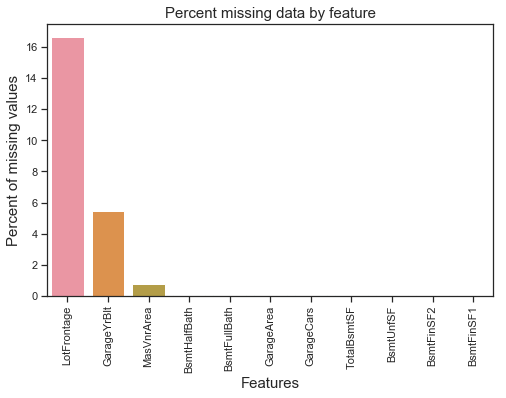

In [32]:
plt.figure(figsize = (8,5))
sns.barplot(x=data_nan.index, y=data_nan)
plt.xlabel('Features', fontsize=15)
plt.xticks(rotation= 'vertical' )
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [33]:
all_df["LotFrontage"] = all_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [34]:
all_df["MasVnrArea"] = all_df["MasVnrArea"].fillna(0)

In [35]:
all_df["GarageYrBlt"] = all_df["GarageYrBlt"].fillna(0)

In [36]:
all_df["BsmtFinSF2"] = all_df["BsmtFinSF2"].fillna(0)

In [37]:
all_df['BsmtFinSF1'] = all_df["BsmtFinSF1"].fillna(0)

In [38]:
all_df["BsmtHalfBath"] = all_df["BsmtHalfBath"].fillna(0)

In [39]:
all_df['BsmtFullBath'] = all_df["BsmtFullBath"].fillna(0)

In [40]:
all_df['GarageArea'] = all_df["GarageArea"].fillna(0)

In [41]:
all_df["GarageCars"] = all_df["GarageCars"].fillna(0)

In [42]:
all_df["TotalBsmtSF"] = all_df["TotalBsmtSF"].fillna(0)

In [43]:
all_df["BsmtUnfSF"] = all_df["BsmtUnfSF"].fillna(0)

# Exploration of Categorical Features:

In [44]:
categ_col = list(set(all_df.columns.unique()) - set(numeric_cols))

In [45]:
all_df.shape

(2919, 79)

In [46]:
print(len(categ_col))

43


In [47]:
print((categ_col))

['Condition2', 'BsmtFinType1', 'MasVnrType', 'Condition1', 'Foundation', 'LandContour', 'MSZoning', 'LotShape', 'GarageCond', 'PoolQC', 'ExterCond', 'Street', 'RoofStyle', 'Exterior2nd', 'KitchenQual', 'PavedDrive', 'GarageFinish', 'BsmtCond', 'HeatingQC', 'BsmtFinType2', 'LandSlope', 'BsmtQual', 'RoofMatl', 'LotConfig', 'Fence', 'Utilities', 'ExterQual', 'SaleType', 'FireplaceQu', 'Heating', 'SaleCondition', 'HouseStyle', 'GarageType', 'BldgType', 'Functional', 'Electrical', 'GarageQual', 'CentralAir', 'MiscFeature', 'BsmtExposure', 'Alley', 'Exterior1st', 'Neighborhood']


In [48]:
categ_col_df = all_df[['Neighborhood', 'MSZoning', 'RoofStyle', 'SaleCondition', 'HouseStyle', 'Utilities', 'LandContour',
                        'MasVnrType', 'Functional', 'Condition1', 'KitchenQual', 'ExterQual', 'PoolQC', 'Foundation',
                        'Heating', 'LotConfig', 'GarageCond', 'LandSlope', 'Street', 'Exterior2nd', 'BsmtQual', 
                        'Exterior1st', 'GarageFinish', 'BsmtExposure', 'GarageType', 'HeatingQC', 'CentralAir', 
                        'PavedDrive', 'SaleType', 'BsmtCond', 'RoofMatl', 'Alley', 'LotShape', 'BldgType', 'BsmtFinType1', 
                        'GarageQual', 'Electrical', 'Fence', 'MiscFeature', 'ExterCond', 'FireplaceQu', 'BsmtFinType2',
                        'Condition2']]

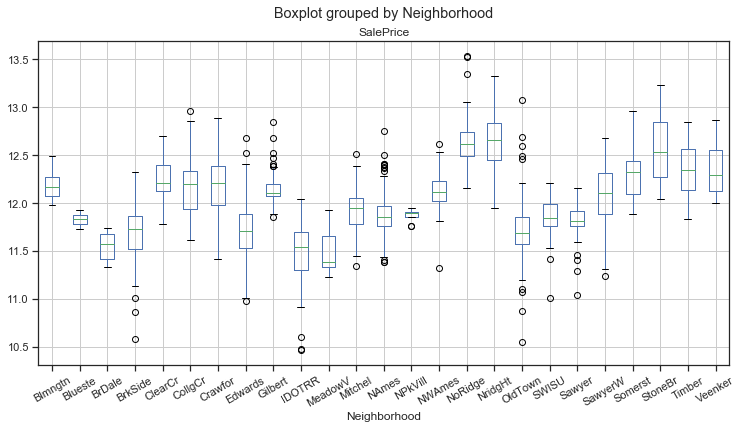

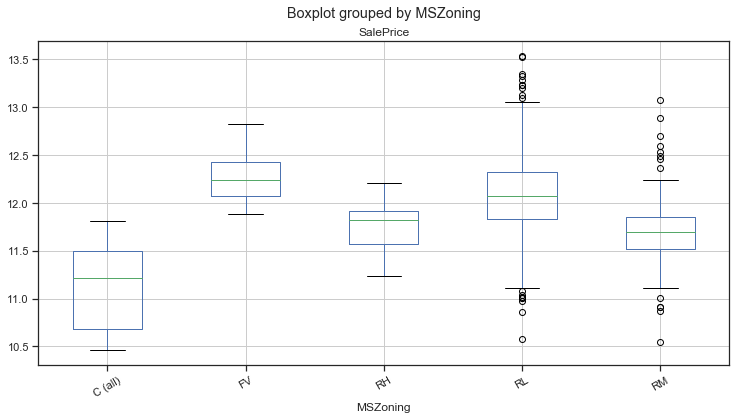

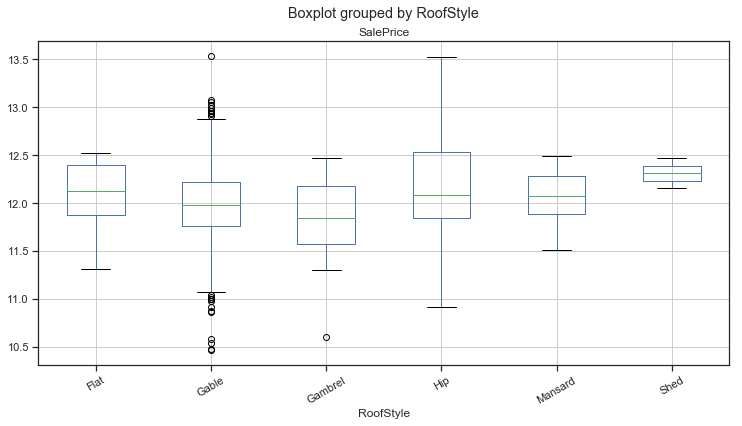

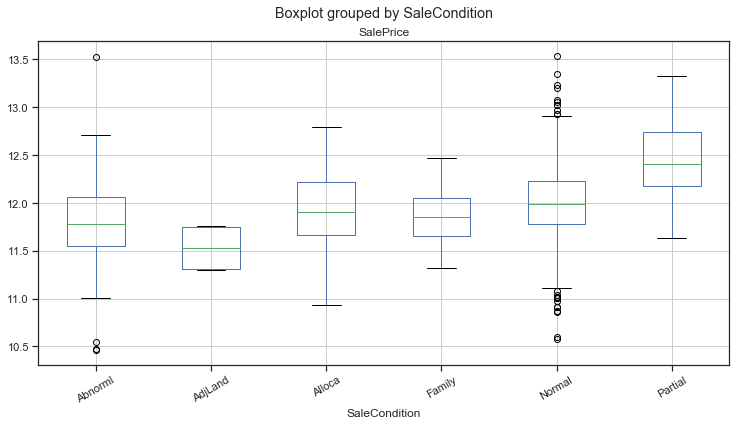

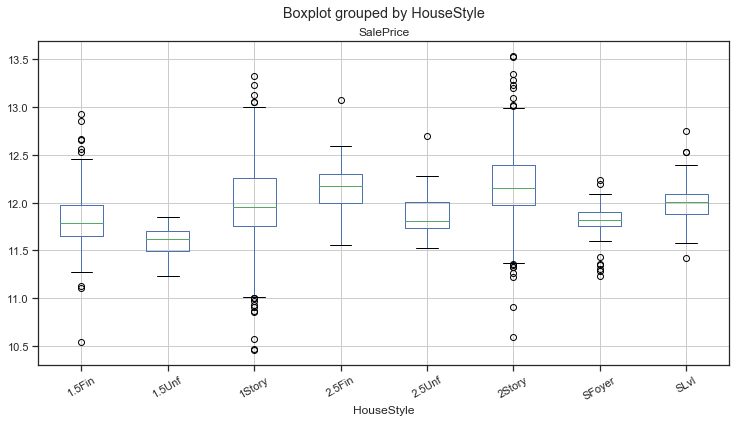

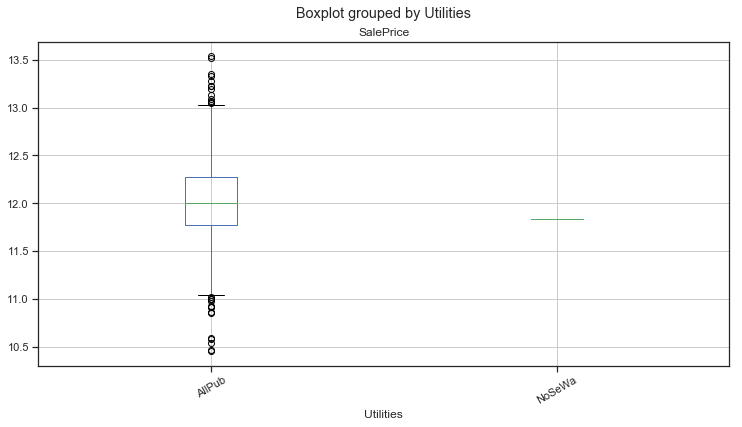

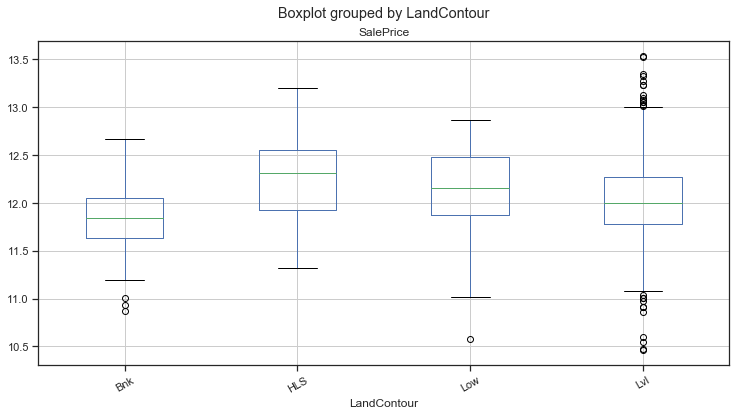

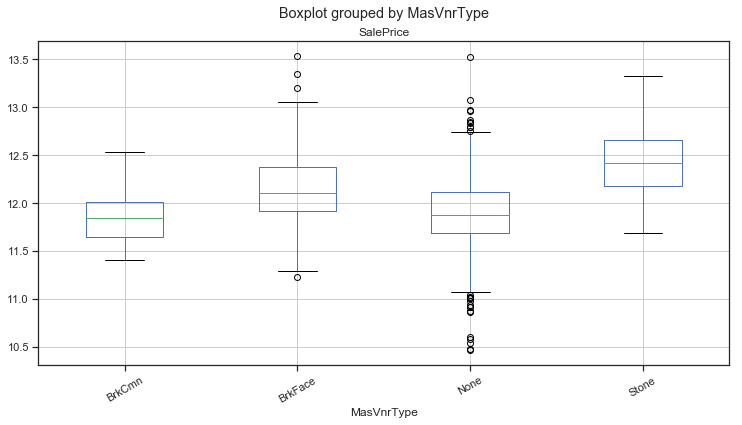

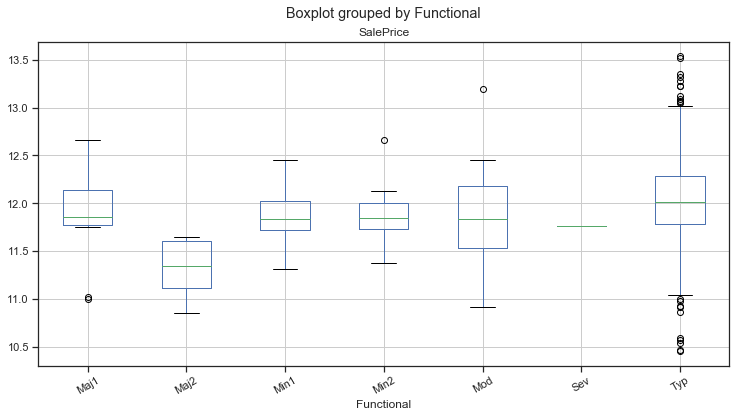

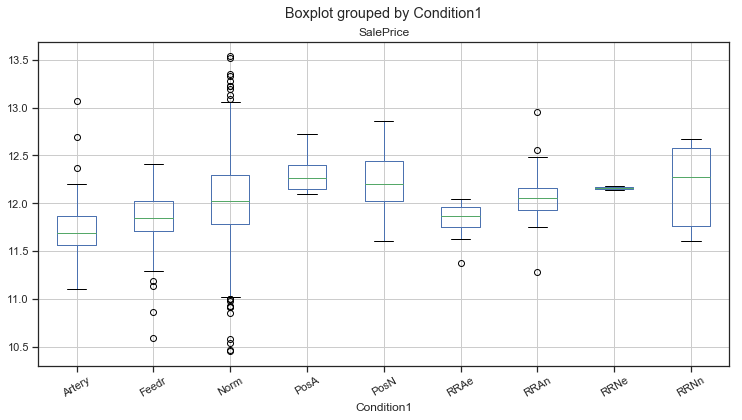

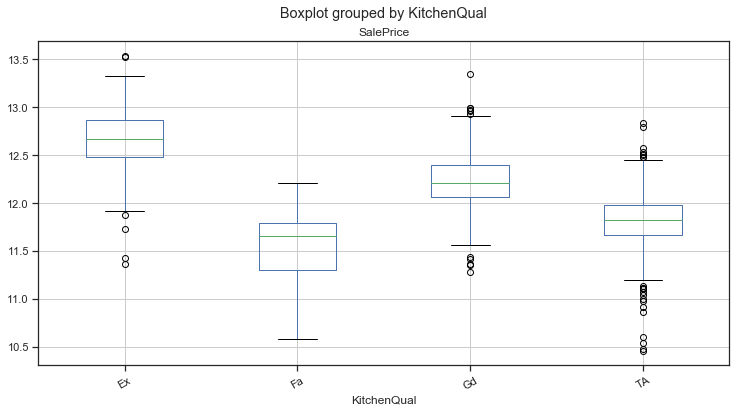

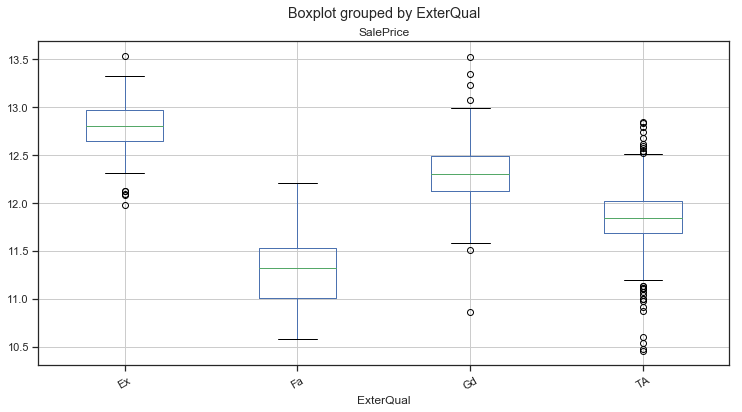

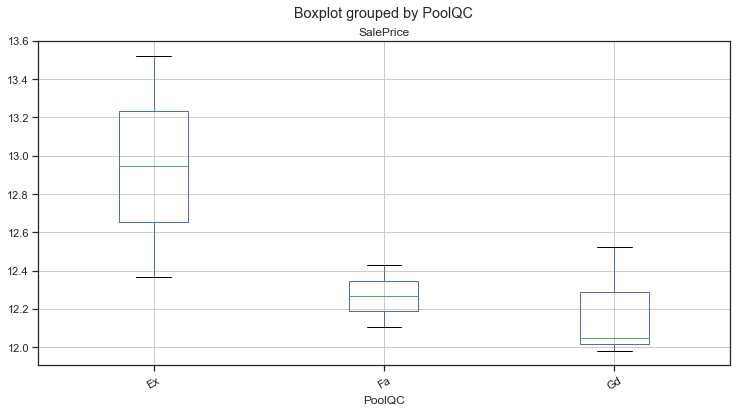

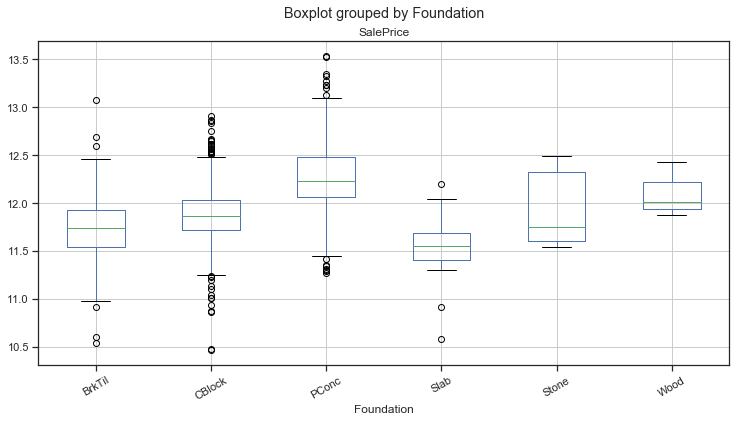

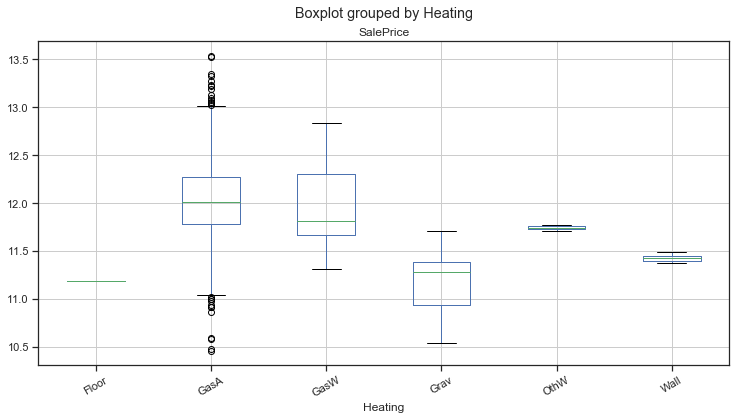

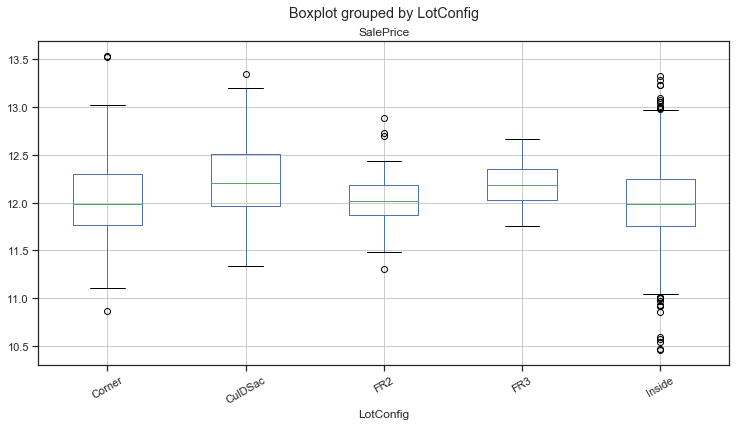

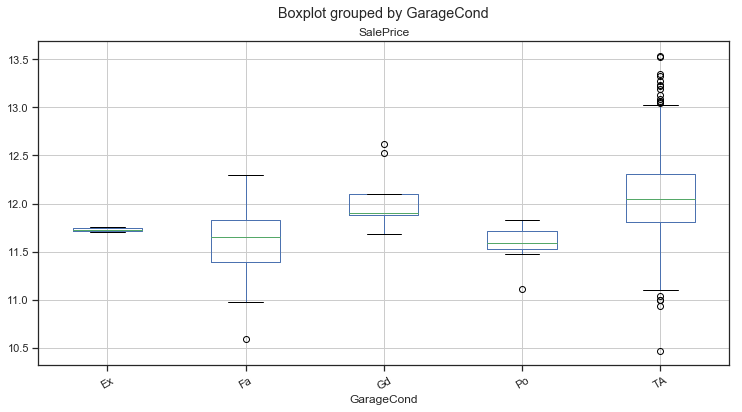

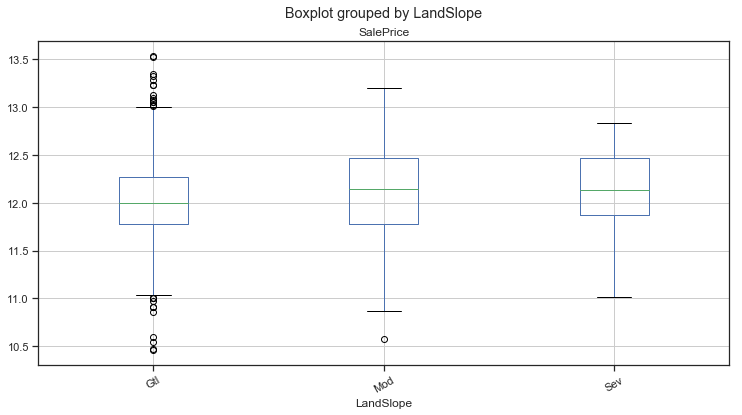

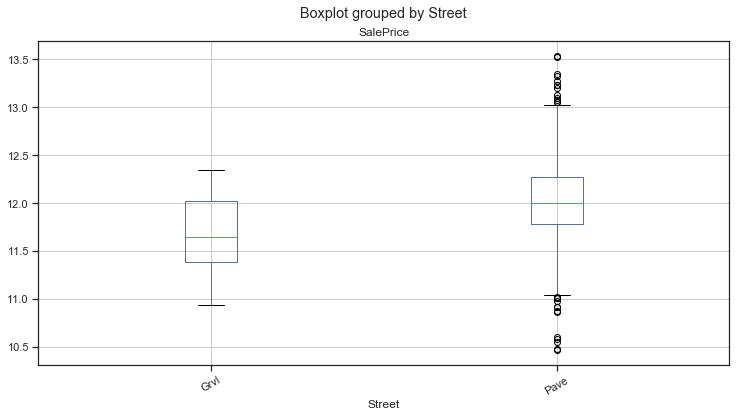

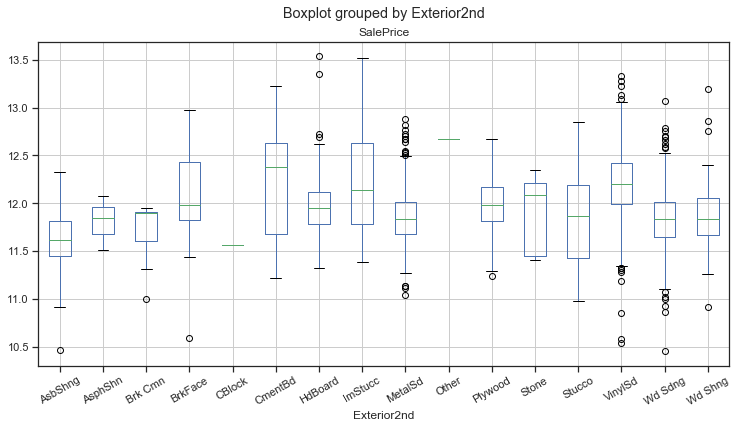

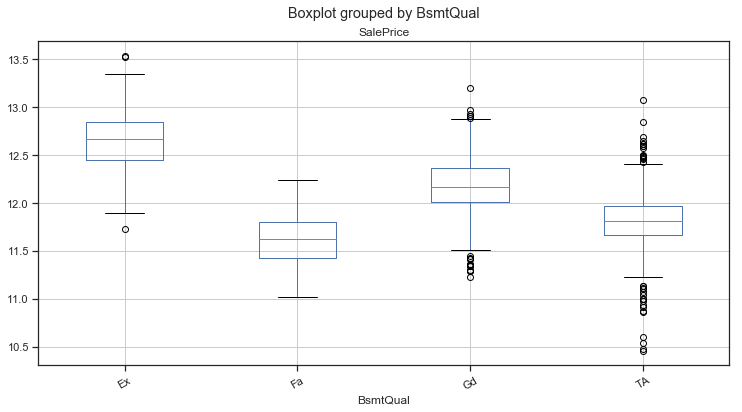

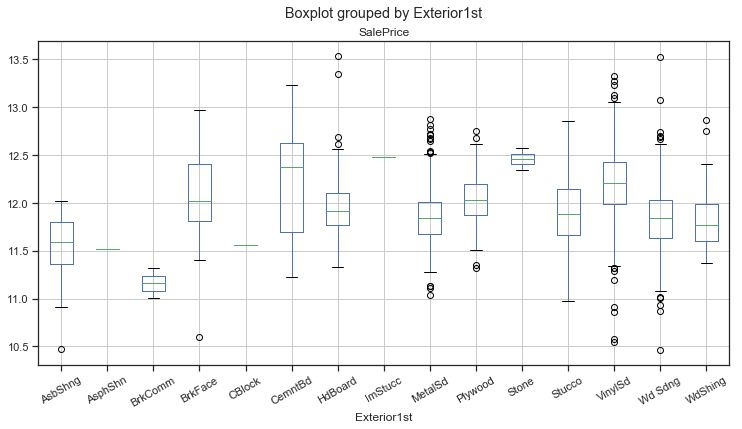

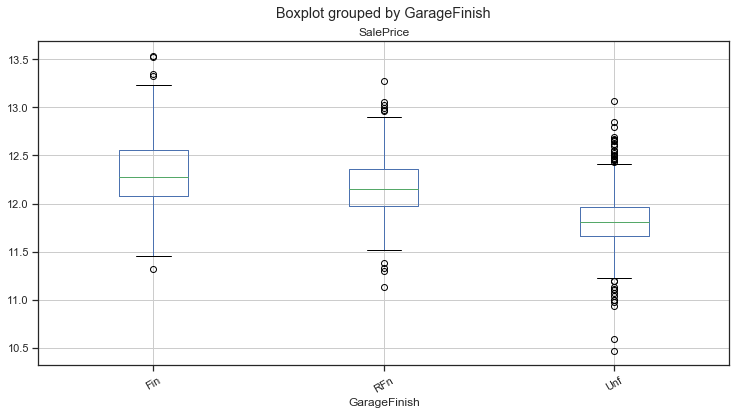

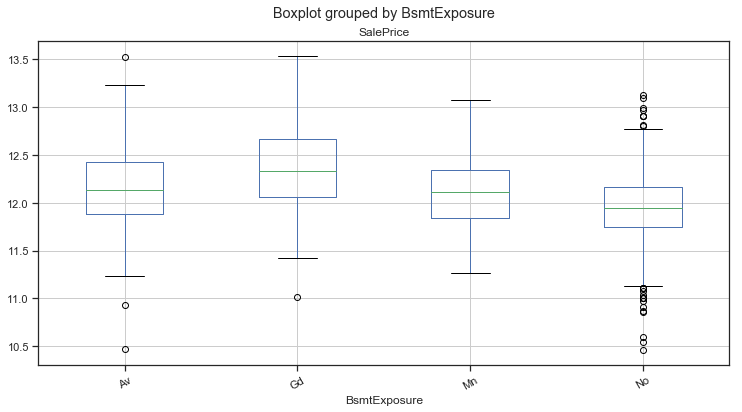

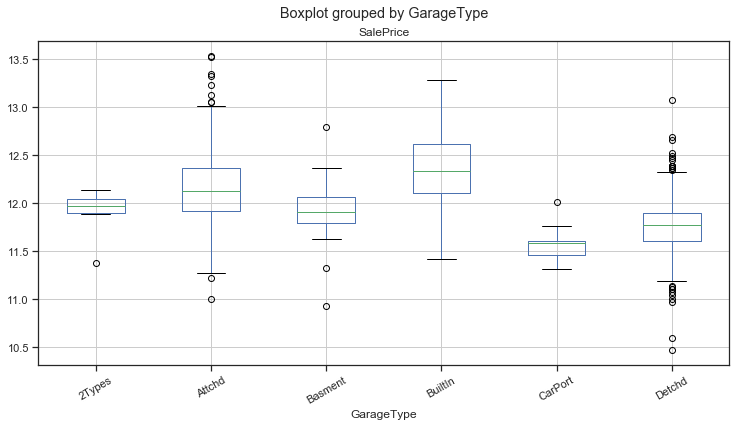

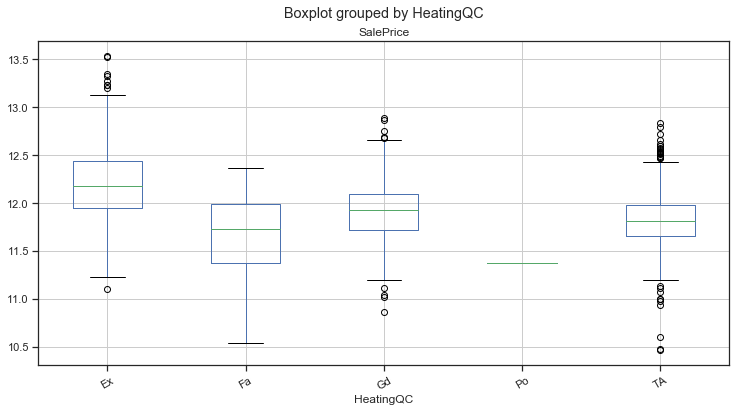

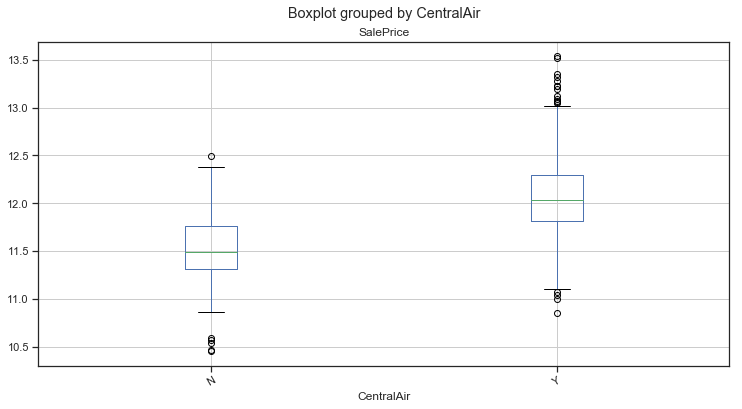

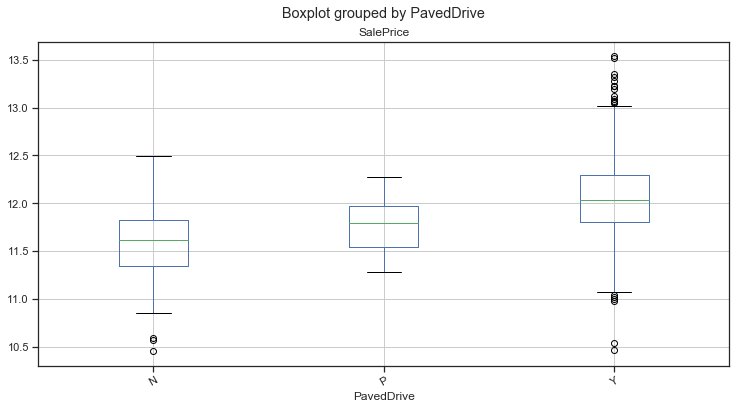

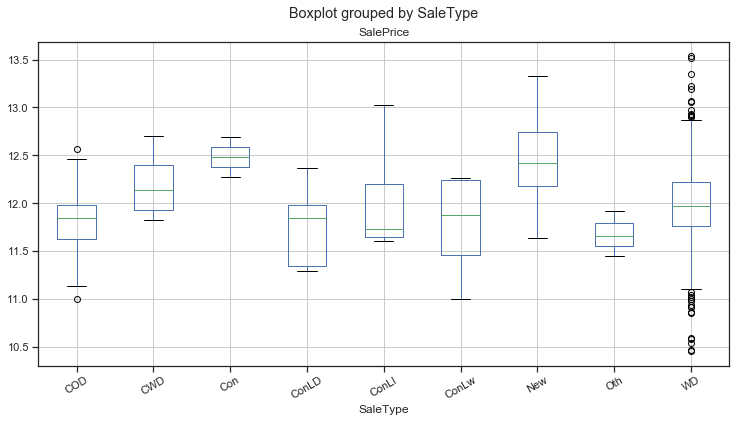

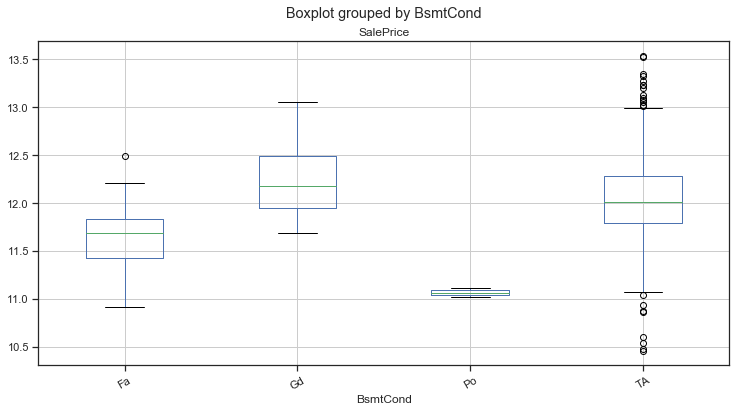

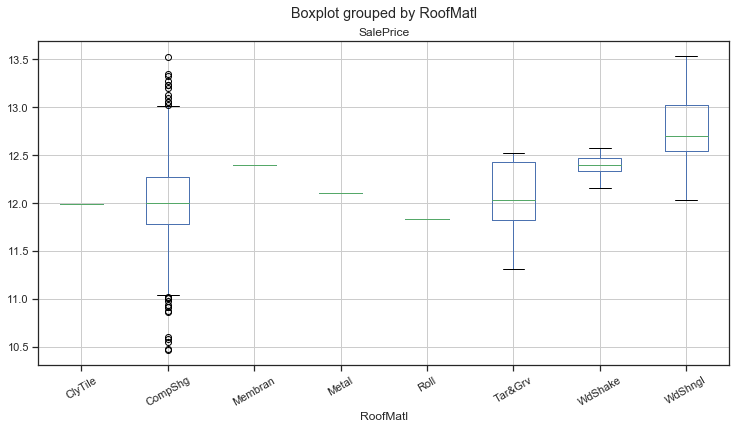

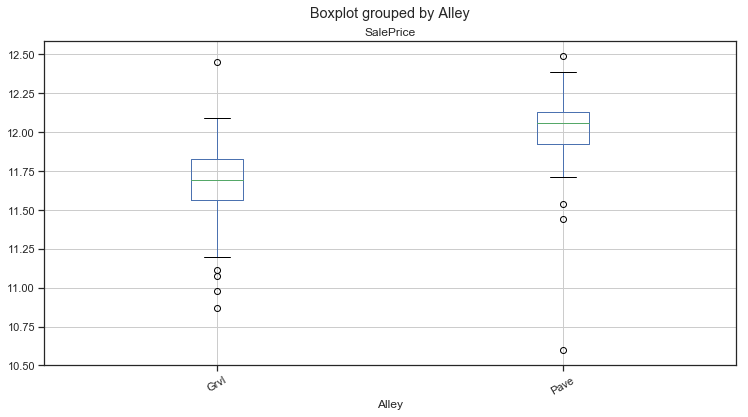

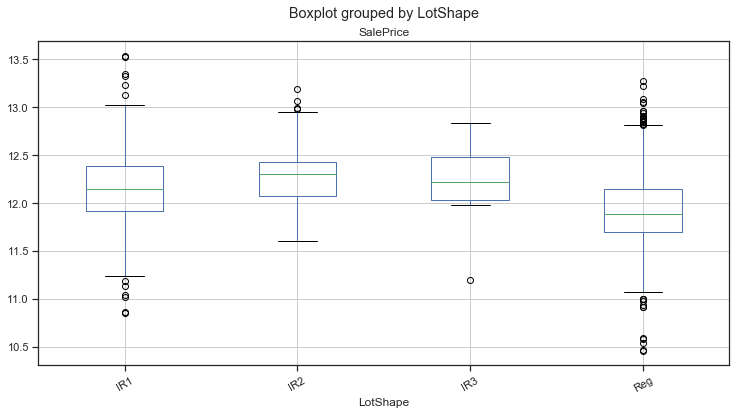

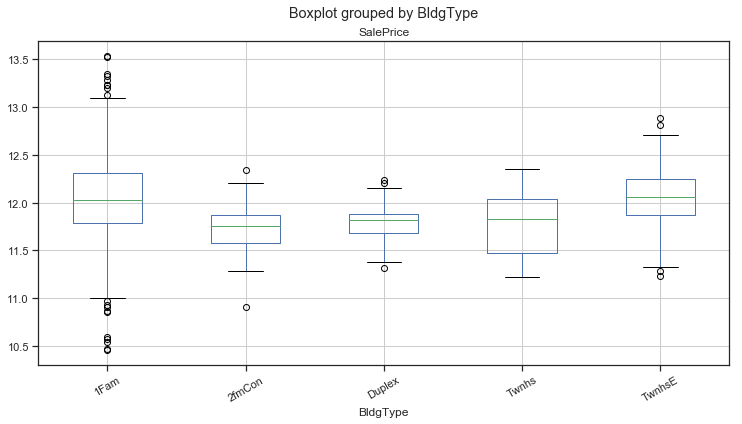

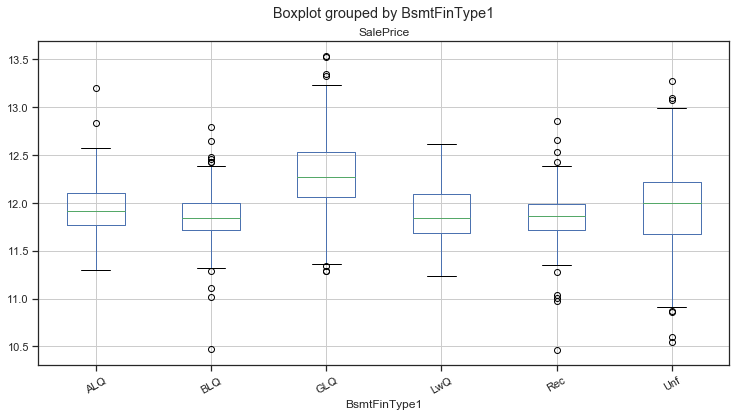

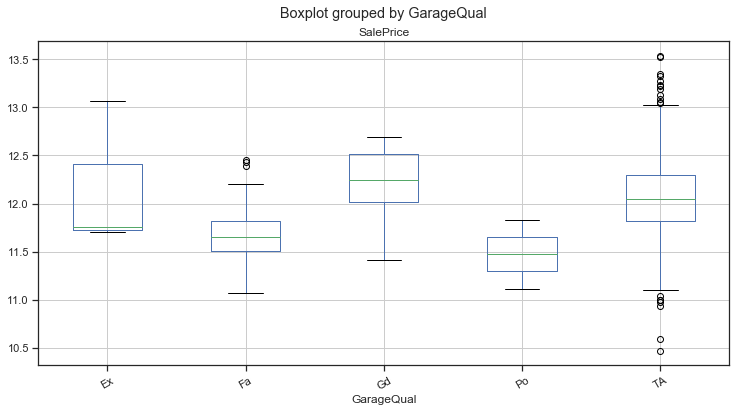

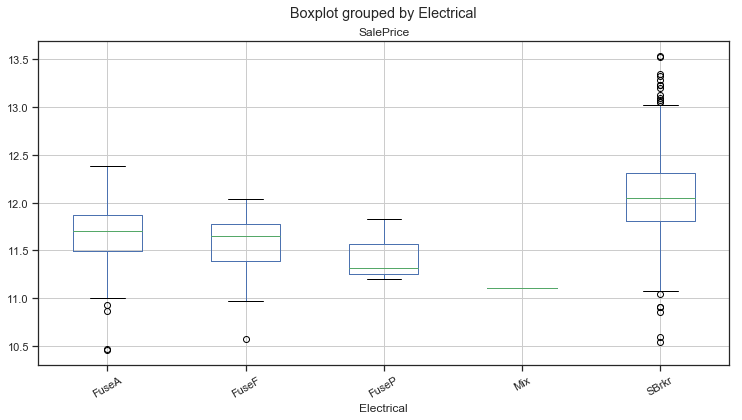

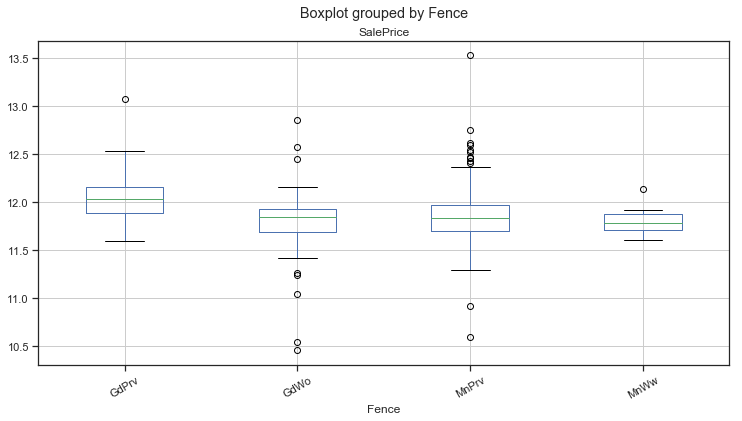

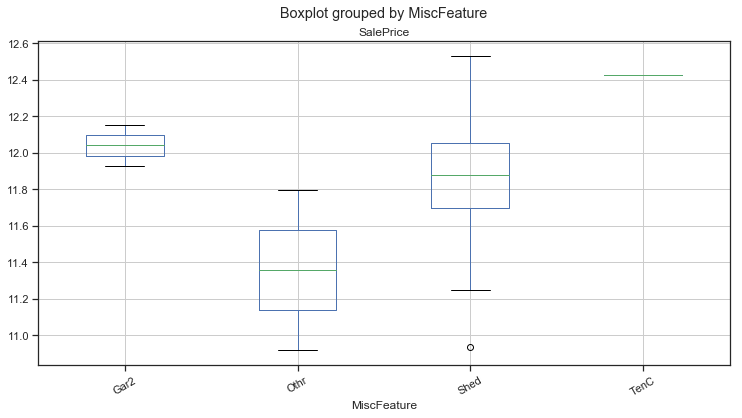

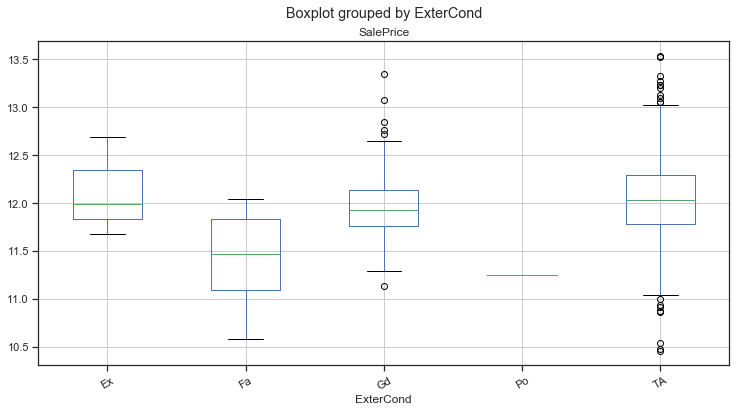

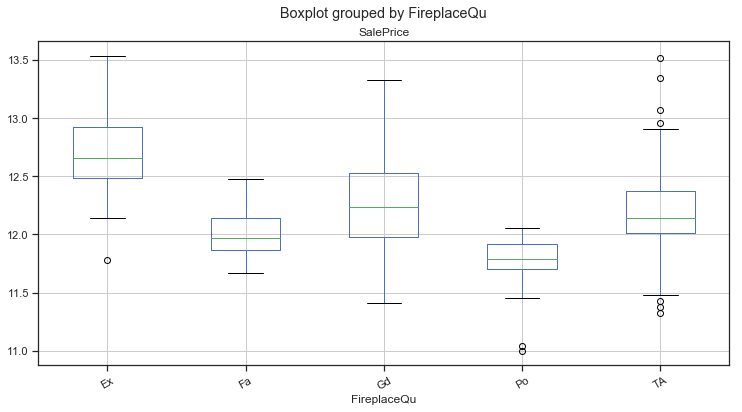

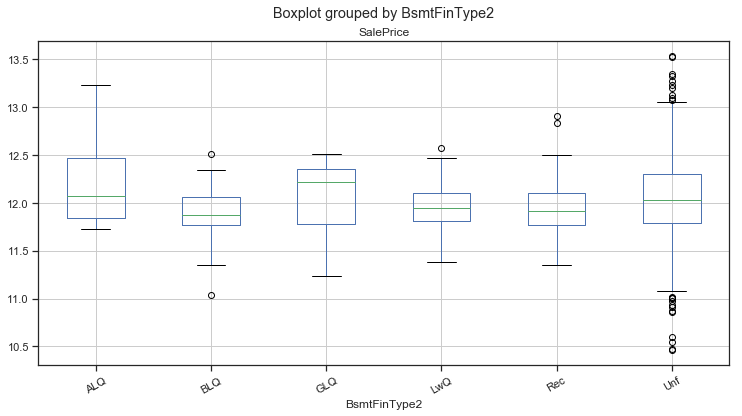

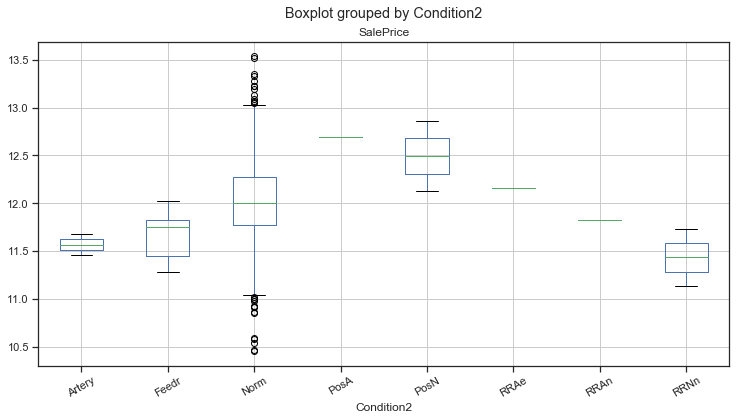

In [49]:
for i in categ_col_df:
    train_df.boxplot("SalePrice",i, rot = 30, figsize = (12,6))

# Handling missing data in categorical cols:

In [50]:
data_nan1 = (categ_col_df.isnull().sum() / len(categ_col_df)) * 100
data_nan1 = data_nan1.drop(data_nan1[data_nan1 == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_nan1})
missing_data

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageType,5.378554
BsmtExposure,2.809181


Text(0.5, 1.0, 'Percent missing data by feature')

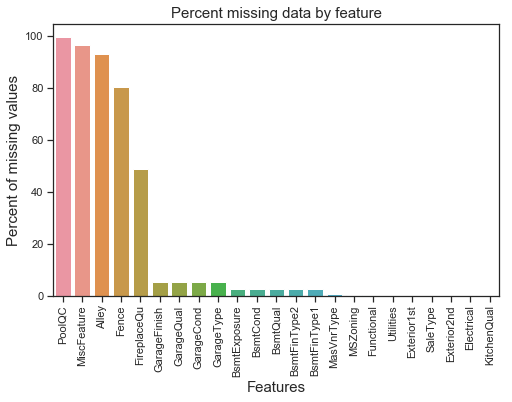

In [51]:
plt.figure(figsize = (8,5))
plt.xticks(rotation =90)
sns.barplot(x=data_nan1.index, y=data_nan1)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [52]:
all_df["PoolQC"] = all_df["PoolQC"].fillna("None")

In [53]:
all_df["MiscFeature"] = all_df["MiscFeature"].fillna("None")

In [54]:
all_df["Alley"] = all_df["Alley"].fillna("None")

In [55]:
all_df["Fence"] = all_df["Fence"].fillna("None")

In [56]:
all_df["FireplaceQu"] = all_df["FireplaceQu"].fillna("None")

In [57]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_df[col] = all_df[col].fillna('None')

In [58]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_df[col] = all_df[col].fillna('None')

In [59]:
all_df["MasVnrType"] = all_df["MasVnrType"].fillna("None")

In [60]:
all_df["MSZoning"] = all_df["MSZoning"].fillna("None")

In [61]:
all_df["Exterior1st"] =all_df["Exterior1st"].fillna("None")

In [62]:
all_df["Exterior2nd"] = all_df["Exterior2nd"].fillna("None")

In [63]:
all_df["Functional"] = all_df["Functional"].fillna("None")

In [64]:
all_df["SaleType"] = all_df["SaleType"].fillna("None")

In [65]:
all_df["KitchenQual"] = all_df["KitchenQual"].fillna("None")

In [66]:
all_df['Electrical'] = all_df['Electrical'].fillna(all_df['Electrical'].mode()[0])

In [72]:
all_df = all_df.drop(['Utilities'], axis=1)

In [74]:
all_df.isnull().values.sum()

0

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
cols = ('Neighborhood', 'MSZoning', 'RoofStyle', 'SaleCondition', 'HouseStyle', 'LandContour',
                        'MasVnrType', 'Functional', 'Condition1', 'KitchenQual', 'ExterQual', 'PoolQC', 'Foundation',
                        'Heating', 'LotConfig', 'GarageCond', 'LandSlope', 'Street', 'Exterior2nd', 'BsmtQual', 
                        'Exterior1st', 'GarageFinish', 'BsmtExposure', 'GarageType', 'HeatingQC', 'CentralAir', 
                        'PavedDrive', 'SaleType', 'BsmtCond', 'RoofMatl', 'Alley', 'LotShape', 'BldgType', 'BsmtFinType1', 
                        'GarageQual', 'Electrical', 'Fence', 'MiscFeature', 'ExterCond', 'FireplaceQu', 'BsmtFinType2',
                        'Condition2')

In [77]:
for c in cols:
    label = LabelEncoder() 
    label.fit(list(all_df[c].values)) 
    all_df[c] = label.transform(list(all_df[c].values))

In [78]:
all_df.shape

(2919, 78)

In [79]:
all_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,0,4,3,706.0,0.0,...,4,9,0,1,8,856.0,0,2003,2003,2008
1,1262,0,0,1,3,0,4,1,978.0,0.0,...,4,9,0,1,6,1262.0,298,1976,1976,2007
2,920,866,0,1,3,0,4,2,486.0,0.0,...,4,9,0,1,6,920.0,0,2001,2002,2008
3,961,756,0,1,3,0,1,3,216.0,0.0,...,0,9,0,1,7,756.0,0,1915,1970,2006
4,1145,1053,0,1,4,0,4,0,655.0,0.0,...,4,9,0,1,9,1145.0,192,2000,2000,2008


In [80]:
ntrain = train_df.shape[0]
ntrain

1460

In [81]:
ntest = test_df.shape[0]
ntest

1459

In [82]:
new_train_df = all_df[:ntrain].copy()

In [83]:
new_train_df["SalePrice"] = sale_price

In [84]:
new_train_df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [85]:
test_df = all_df[:ntest]
test_df.shape

(1459, 78)

# Model Fitting:

1. Linear Regression:

In [86]:
X = new_train_df.drop("SalePrice", axis = 1)

In [87]:
Y = new_train_df["SalePrice"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Accuracy is", model.score(X_test, y_test)*100)

Accuracy is 86.31906311262904


2. Random Forest:

In [90]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
print("Accuracy is ", model.score(X_test, y_test)*100)

Accuracy is  90.53077165558058


3. Gradient Boosting:

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR.fit(X_train, y_train)
print("Accuracy is ", GBR.score(X_test, y_test)*100)

Accuracy is  91.697188392775


4. Ridge Regression:

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
ridge = Ridge()
MSEs = cross_val_score(ridge, X, Y, cv=5)
print(MSEs)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

[0.86449179 0.81030458 0.85643291 0.83627799 0.64690199]
0.8028818539099973


In [93]:
#Test predictions

In [94]:
predicted_price = pd.Series(GBR.predict(test_df), name = "SalePrice")

submission_df = pd.concat([test_id,predicted_price], axis=1)

In [95]:
submission_df.head()

,Id,SalePrice
0,1461,204749.194900
1,1462,171558.884940
2,1463,207147.581377
3,1464,153365.984935
4,1465,287867.820355


In [96]:
filename = 'House SalePrice Predictions 1.csv'

submission_df.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: House SalePrice Predictions 1.csv
